<a href="https://colab.research.google.com/github/vijayshankarrealdeal/GoogleColab/blob/main/Retino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized

100% 7.24G/7.25G [02:50<00:00, 57.0MB/s]
100% 7.25G/7.25G [02:50<00:00, 45.6MB/s]


In [ ]:
!unzip '/content/diabetic-retinopathy-resized.zip' -d '/content/data'

In [4]:
import shutil

In [5]:
mydir= '/content/data/resized_train_cropped'
shutil.rmtree(mydir)

In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv('/content/data/trainLabels.csv')

In [8]:
data.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [9]:
len(data)

35126

In [10]:
base_path = '/content/data/resized_train/resized_train'

In [ ]:
os.listdir(base_path)

In [12]:
# 0 - No DR
# 1 - Mild
# 2 - Moderate
# 3 - Severe
# 4 - Proliferative DR

In [13]:
!mkdir train

In [14]:
cd train

/content/train


In [15]:
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

In [16]:
cd ..

/content


In [17]:
!mkdir test

In [18]:
cd test

/content/test


In [19]:
!mkdir 0
!mkdir 1
!mkdir 2
!mkdir 3
!mkdir 4

In [20]:
def give_folder_name(break_point,folder_value,main_path,file):
  if break_point < 27000:
    train_path = '/content/train/' + str(folder_value) + '/' + file
    if folder_value == 0:
      shutil.copy(main_path,train_path)
    elif folder_value == 1:
      shutil.copy(main_path,train_path)
    elif folder_value == 2:
      shutil.copy(main_path,train_path)
    elif folder_value == 3:
      shutil.copy(main_path,train_path)
    elif folder_value == 4:
      shutil.copy(main_path,train_path)

  else:
    test_path = '/content/test/' + str(folder_value) + '/' + file

    if folder_value == 0:
      shutil.copy( main_path,test_path)
    elif folder_value == 1:
      shutil.copy( main_path,test_path)
    elif folder_value == 2:
      shutil.copy( main_path,test_path)
    elif folder_value == 3:
      shutil.copy( main_path,test_path)
    elif folder_value == 4:
      shutil.copy( main_path,test_path)


In [ ]:
count = 0
for image  in os.listdir(base_path):
  t = data[data['image'] == image[:-5]]
  main_path = base_path +'/'+str(t['image'].values.squeeze()) + '.jpeg'
  value = int(t['level'].values)

  file_name = str(t['image'].values.squeeze()) + '.jpeg'
  give_folder_name(count , value , main_path , file_name)
  count += 1 
  print(t.values.squeeze())

In [22]:
train_len = len(os.listdir('/content/train/0') + os.listdir('/content/train/1') +os.listdir('/content/train/2') +os.listdir('/content/train/3') ),os.listdir('/content/train/4')

In [23]:
test_len = test_len = len(os.listdir('/content/test/0') + os.listdir('/content/test/1') +os.listdir('/content/test/2') +os.listdir('/content/test/3') ),os.listdir('/content/test/4')

In [24]:
train_test_ratio = test_len[0]/train_len[0]
train_test_ratio*100

30.04118336041108

In [25]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [26]:
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=10,
    zoom_range = 0.1, 
    rescale = 1./255,
    width_shift_range=0.1, 
    height_shift_range=0.1,
    horizontal_flip=True, 
    vertical_flip=False)

In [27]:
train_data = datagen.flow_from_directory(
    '/content/train', 
    target_size=(256, 256), 
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    )

Found 27000 images belonging to 5 classes.


In [28]:
len(train_data.classes)

27000

In [29]:
test_genrator = ImageDataGenerator(
    rescale = 1./255,
)

In [30]:
test_data = test_genrator.flow_from_directory(
    '/content/test'
)

Found 8126 images belonging to 5 classes.


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(128,kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256,activation='relu'),
    tf.keras.layers.Dense(units = 5,activation='softmax')]
)

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 128)       1

In [32]:
model.compile(optimizer='Adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [38]:
history = model.fit(train_data,epochs=4,batch_size=64)

Epoch 1/4
422/422 [==============================] - 819s 2s/step - loss: 0.8698 - accuracy: 0.7337
Epoch 2/4
422/422 [==============================] - 816s 2s/step - loss: 0.8695 - accuracy: 0.7337
Epoch 3/4
422/422 [==============================] - 802s 2s/step - loss: 0.8665 - accuracy: 0.7337
Epoch 4/4
422/422 [==============================] - 812s 2s/step - loss: 0.8672 - accuracy: 0.7337


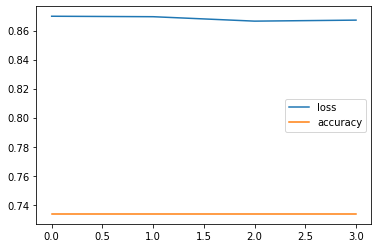

In [40]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [69]:
predict = model.predict(test_data)

In [71]:
predict_ = []
predict_ = np.argmax(predict,axis=1)

In [70]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

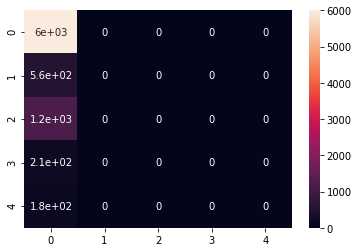

In [76]:
cm = confusion_matrix(test_data.classes,predict_)
sns.heatmap(cm,annot=True)

In [72]:
accuracy_score(test_data.classes,predict_)*100

73.83706620723603

In [87]:
labels__ = {
0 : 'No DR',
1 : 'Mild',
2 : 'Moderate',
3 : 'Severe',
4 : 'Proliferative DR',
}

In [91]:
labels__.values()

dict_values(['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'])

In [96]:
clf = classification_report(test_data.classes,predict_,labels=list(labels__.keys()),
                            
                            target_names=list(labels__.values()),
                            output_dict=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


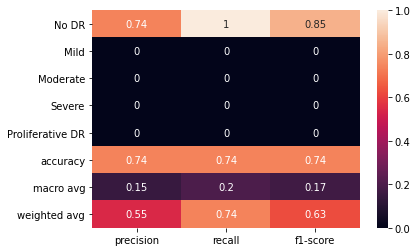

In [98]:
sns.heatmap(pd.DataFrame(clf).iloc[:-1, :].T, annot=True)

In [80]:
model.save('/content/my_model.h5')

In [131]:
import PIL.Image as Image
def for_version_test(dir_):
  test_oneImage = '/content/test/'+ str(dir_) 
  preX = 0
  total = len(os.listdir(test_oneImage))
  for i in os.listdir(test_oneImage):
    image = test_oneImage + '/' + i
    im = Image.open(image)
    im = im.resize((256,256))
    im = np.asarray(im,dtype='float32')
    im = im.reshape(1,256,256,3)
    j = model.predict(im)
    if np.argmax(j) == dir_:
      preX += 1
  return preX,total

In [132]:
#for NO_DR
for_version_test(0)

(3806, 6000)

In [133]:
#For Mild
for_version_test(1)

(1, 565)

In [134]:
#For Moderate
for_version_test(2)

(513, 1176)

In [135]:
#For Severe
for_version_test(3)

(0, 210)

In [136]:
#For Proliferative DR
for_version_test(4)

(0, 175)